# SVM & Naive bayes_Assignment_Vivek

In [1]:
# Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:
# Import necessary libraries
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data        # Features
y = iris.target      # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier (default kernel is 'rbf')
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [2]:
# Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies:
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print accuracy comparison
print("Accuracy with Linear Kernel:", accuracy_linear)
print("Accuracy with RBF Kernel:", accuracy_rbf)

# Determine which kernel performed better
if accuracy_linear > accuracy_rbf:
    print("\nLinear kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("\nRBF kernel performed better.")
else:
    print("\nBoth kernels performed equally well.")


Accuracy with Linear Kernel: 0.9722222222222222
Accuracy with RBF Kernel: 1.0

RBF kernel performed better.


In [3]:
# Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE):
# Import required libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # Reshape needed for scaling

# Train an SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict and reverse transform the scaled output
y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)



Mean Squared Error (MSE): 6.467351332710815


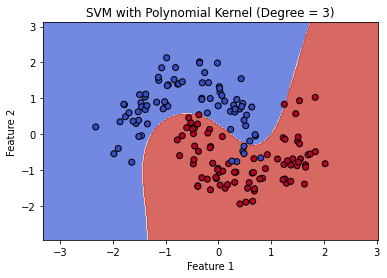

In [4]:
# : Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Step 1: Generate a synthetic 2D dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, coef0=1, gamma='auto')
svm_poly.fit(X_train_scaled, y_train)

# Step 4: Visualize decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot using scaled training data
plot_decision_boundary(svm_poly, X_train_scaled, y_train, "SVM with Polynomial Kernel (Degree = 3)")


In [5]:
# Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Detailed performance report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[40  3]
 [ 0 71]]


In [6]:
# Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the 20 Newsgroups dataset
categories = ['sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.misc']  # Example subset
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Step 2: Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Step 3: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = mnb.predict(X_test)

# Step 6: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9798927613941019

Classification Report:
                     precision    recall  f1-score   support

     comp.graphics       0.97      0.98      0.97       210
rec.sport.baseball       0.99      0.99      0.99       192
         sci.space       0.98      0.97      0.98       196
talk.politics.misc       0.98      0.99      0.98       148

          accuracy                           0.98       746
         macro avg       0.98      0.98      0.98       746
      weighted avg       0.98      0.98      0.98       746

Confusion Matrix:
 [[205   0   2   3]
 [  1 190   1   0]
 [  6   0 190   0]
 [  0   2   0 146]]


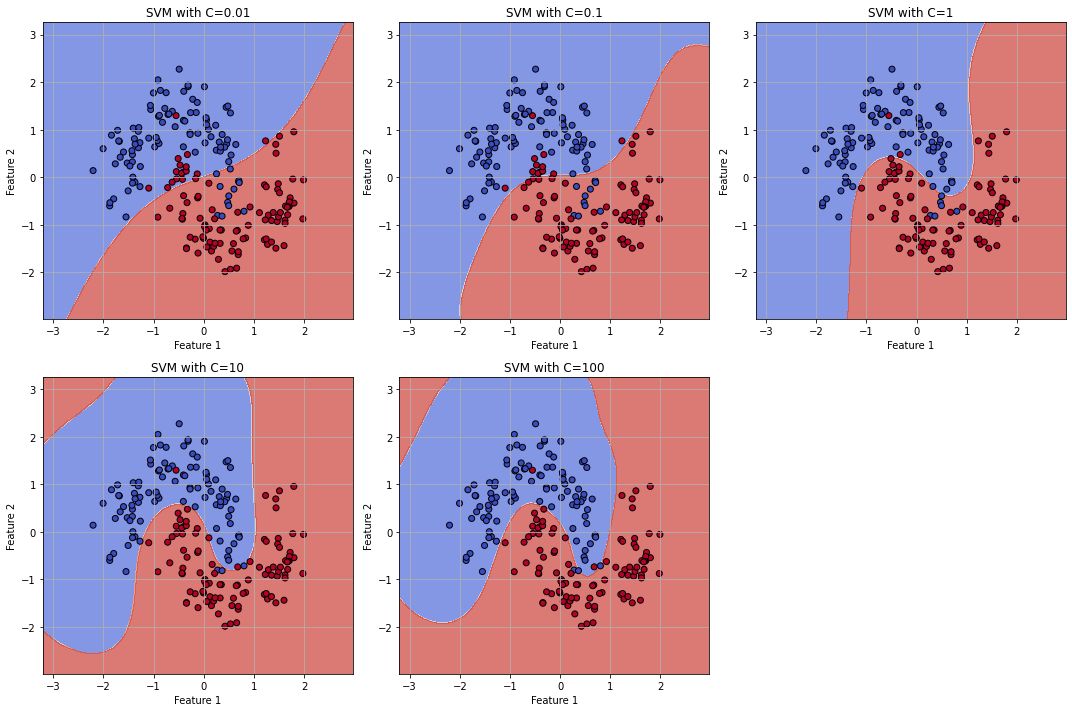

In [7]:
# Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Step 1: Generate a 2D classification dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Function to plot decision boundaries
def plot_svm_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

# Step 4: Try different values of C
C_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(15, 10))
for i, C in enumerate(C_values, 1):
    svm_clf = SVC(kernel='rbf', C=C, gamma='auto')
    svm_clf.fit(X_scaled, y)
    
    plt.subplot(2, 3, i)
    plot_svm_decision_boundary(X_scaled, y, svm_clf, title=f"SVM with C={C}")

plt.tight_layout()
plt.show()


In [8]:
# Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Step 1: Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

# Step 2: Binarize the features (threshold = 0)
binarizer = Binarizer(threshold=0.0)
X_binary = binarizer.fit_transform(X)

# Step 3: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Step 4: Train the Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = bnb.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.765

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       102
           1       0.77      0.74      0.76        98

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion Matrix:
 [[80 22]
 [25 73]]


In [10]:
# Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load example dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 1. Train SVM without feature scaling ---
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print(f"Accuracy without feature scaling: {accuracy_unscaled:.4f}")

# --- 2. Apply feature scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with scaled data
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with feature scaling: {accuracy_scaled:.4f}")


Accuracy without feature scaling: 1.0000
Accuracy with feature scaling: 1.0000


In [12]:
# Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a subset of the 20 newsgroups dataset (text classification)
categories = ['alt.atheism', 'sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)

# Vectorize text data into word counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train MultinomialNB without smoothing (alpha=0)
mnb_no_smoothing = MultinomialNB(alpha=0)
mnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = mnb_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print(f"Accuracy without Laplace smoothing (alpha=0): {acc_no_smoothing:.4f}")

# Train MultinomialNB with Laplace smoothing (alpha=1)
mnb_laplace = MultinomialNB(alpha=1)
mnb_laplace.fit(X_train, y_train)
y_pred_laplace = mnb_laplace.predict(X_test)
acc_laplace = accuracy_score(y_test, y_pred_laplace)
print(f"Accuracy with Laplace smoothing (alpha=1): {acc_laplace:.4f}")


Accuracy without Laplace smoothing (alpha=0): 1.0000
Accuracy with Laplace smoothing (alpha=1): 0.9876


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [15]:
# Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel)
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model
svc = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9714

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.9s finished


In [14]:
# Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM without class weighting
svm_no_weights = SVC(kernel='rbf', class_weight=None)
svm_no_weights.fit(X_train, y_train)
y_pred_no_weights = svm_no_weights.predict(X_test)

print("Without Class Weighting:")
print(confusion_matrix(y_test, y_pred_no_weights))
print(classification_report(y_test, y_pred_no_weights))

# Step 4: Train SVM with class_weight='balanced'
svm_weighted = SVC(kernel='rbf', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

print("\nWith Class Weighting (class_weight='balanced'):")
print(confusion_matrix(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))


Without Class Weighting:
[[270   5]
 [ 14  11]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       275
           1       0.69      0.44      0.54        25

    accuracy                           0.94       300
   macro avg       0.82      0.71      0.75       300
weighted avg       0.93      0.94      0.93       300


With Class Weighting (class_weight='balanced'):
[[260  15]
 [  9  16]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       275
           1       0.52      0.64      0.57        25

    accuracy                           0.92       300
   macro avg       0.74      0.79      0.76       300
weighted avg       0.93      0.92      0.92       300



In [16]:
# Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load dataset (SMS Spam Collection)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Encode label: spam = 1, ham = 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

# Step 3: Convert text to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred = nb.predict(X_test_vec)

# Step 5: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))


Accuracy: 0.9904306220095693

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      1448
        Spam       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [17]:
# Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Step 4: Train Naïve Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Step 5: Print Results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

print("\n--- Classification Report for SVM ---")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names))

print("\n--- Classification Report for Naïve Bayes ---")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))


SVM Accuracy: 1.0000
Naïve Bayes Accuracy: 0.9778

--- Classification Report for SVM ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Classification Report for Naïve Bayes ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [18]:
# Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load text dataset (two categories for binary classification)
categories = ['rec.sport.hockey', 'sci.space']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 2: Vectorize text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)
y = data.target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------- Without Feature Selection ---------
nb_no_fs = MultinomialNB()
nb_no_fs.fit(X_train, y_train)
y_pred_no_fs = nb_no_fs.predict(X_test)

print("Naïve Bayes WITHOUT Feature Selection")
print("Accuracy:", accuracy_score(y_test, y_pred_no_fs))
print(classification_report(y_test, y_pred_no_fs, target_names=categories))

# --------- With Feature Selection (e.g., top 2000 features) ---------
k = 2000
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_fs = MultinomialNB()
nb_fs.fit(X_train_selected, y_train)
y_pred_fs = nb_fs.predict(X_test_selected)

print("\nNaïve Bayes WITH Feature Selection (Top 2000 features)")
print("Accuracy:", accuracy_score(y_test, y_pred_fs))
print(classification_report(y_test, y_pred_fs, target_names=categories))


Naïve Bayes WITHOUT Feature Selection
Accuracy: 0.9630872483221476
                  precision    recall  f1-score   support

rec.sport.hockey       0.96      0.97      0.96       300
       sci.space       0.97      0.96      0.96       296

        accuracy                           0.96       596
       macro avg       0.96      0.96      0.96       596
    weighted avg       0.96      0.96      0.96       596


Naïve Bayes WITH Feature Selection (Top 2000 features)
Accuracy: 0.9546979865771812
                  precision    recall  f1-score   support

rec.sport.hockey       0.94      0.97      0.96       300
       sci.space       0.97      0.94      0.95       296

        accuracy                           0.95       596
       macro avg       0.96      0.95      0.95       596
    weighted avg       0.96      0.95      0.95       596



In [19]:
# Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with One-vs-Rest strategy
ovr_model = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale'))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
ovr_acc = accuracy_score(y_test, y_pred_ovr)

# Step 4: Train SVM with One-vs-One strategy
ovo_model = OneVsOneClassifier(SVC(kernel='rbf', gamma='scale'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
ovo_acc = accuracy_score(y_test, y_pred_ovo)

# Step 5: Print and compare results
print(f"Accuracy (One-vs-Rest): {ovr_acc:.4f}")
print(f"Accuracy (One-vs-One): {ovo_acc:.4f}")

print("\n--- Classification Report: One-vs-Rest ---")
print(classification_report(y_test, y_pred_ovr, target_names=wine.target_names))

print("\n--- Classification Report: One-vs-One ---")
print(classification_report(y_test, y_pred_ovo, target_names=wine.target_names))


Accuracy (One-vs-Rest): 0.7222
Accuracy (One-vs-One): 0.7963

--- Classification Report: One-vs-Rest ---
              precision    recall  f1-score   support

     class_0       0.83      1.00      0.90        19
     class_1       0.65      0.95      0.77        21
     class_2       0.00      0.00      0.00        14

    accuracy                           0.72        54
   macro avg       0.49      0.65      0.56        54
weighted avg       0.54      0.72      0.62        54


--- Classification Report: One-vs-One ---
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.78      0.67      0.72        21
     class_2       0.59      0.71      0.65        14

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.81      0.80      0.80        54



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with different kernels

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Step 4: Display accuracy results
print(f"Accuracy with Linear Kernel:     {acc_linear:.4f}")
print(f"Accuracy with Polynomial Kernel: {acc_poly:.4f}")
print(f"Accuracy with RBF Kernel:        {acc_rbf:.4f}")

# Step 5: Detailed classification reports
print("\n--- Classification Report: Linear Kernel ---")
print(classification_report(y_test, y_pred_linear, target_names=data.target_names))

print("\n--- Classification Report: Polynomial Kernel ---")
print(classification_report(y_test, y_pred_poly, target_names=data.target_names))

print("\n--- Classification Report: RBF Kernel ---")
print(classification_report(y_test, y_pred_rbf, target_names=data.target_names))


Accuracy with Linear Kernel:     0.9649
Accuracy with Polynomial Kernel: 0.9415
Accuracy with RBF Kernel:        0.9357

--- Classification Report: Linear Kernel ---
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


--- Classification Report: Polynomial Kernel ---
              precision    recall  f1-score   support

   malignant       0.98      0.86      0.92        63
      benign       0.92      0.99      0.96       108

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171


--- Classification Report: RBF Kernel ---
              precision    recall  f1-score   support

   malignant       1.00      0.8

In [21]:
#  Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# List to store accuracy for each fold
accuracies = []

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold} Accuracy: {acc:.4f}")

# Print average accuracy
avg_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")


Fold 1 Accuracy: 0.9386
Fold 2 Accuracy: 0.8772
Fold 3 Accuracy: 0.8947
Fold 4 Accuracy: 0.9386
Fold 5 Accuracy: 0.9204

Average Accuracy: 0.9139


In [22]:
# Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train GaussianNB with default priors
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Step 4: Train GaussianNB with custom prior probabilities
# Let's assign higher prior to class 0 (setosa) arbitrarily
custom_priors = [0.6, 0.2, 0.2]
nb_custom = GaussianNB(priors=custom_priors)
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

# Step 5: Compare results
print(f"Accuracy with default priors: {acc_default:.4f}")
print(f"Accuracy with custom priors {custom_priors}: {acc_custom:.4f}")

print("\n--- Classification Report: Default Priors ---")
print(classification_report(y_test, y_pred_default, target_names=class_names))

print("\n--- Classification Report: Custom Priors ---")
print(classification_report(y_test, y_pred_custom, target_names=class_names))



Accuracy with default priors: 0.9111
Accuracy with custom priors [0.6, 0.2, 0.2]: 0.9111

--- Classification Report: Default Priors ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Classification Report: Custom Priors ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [23]:
# Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with all features
svm_full = SVC(kernel='linear')
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Step 4: Apply RFE to select top N features
n_features = 10
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=n_features)
rfe.fit(X_train, y_train)

# Transform datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Step 5: Train SVM on reduced features
svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# Step 6: Compare results
print(f"Accuracy with all features:       {acc_full:.4f}")
print(f"Accuracy with RFE ({n_features} features): {acc_rfe:.4f}")

print("\n--- Classification Report (All Features) ---")
print(classification_report(y_test, y_pred_full, target_names=data.target_names))

print("\n--- Classification Report (RFE Features) ---")
print(classification_report(y_test, y_pred_rfe, target_names=data.target_names))

# Step 7: Optional - Show selected features
selected_features = [name for name, selected in zip(feature_names, rfe.support_) if selected]
print("\nSelected Features by RFE:")
print(selected_features)


Accuracy with all features:       0.9649
Accuracy with RFE (10 features): 0.9298

--- Classification Report (All Features) ---
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


--- Classification Report (RFE Features) ---
              precision    recall  f1-score   support

   malignant       0.92      0.89      0.90        63
      benign       0.94      0.95      0.94       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171


Selected Features by RFE:
['mean radius', 'mean concavity', 'mean concave points', 'radius error', 'texture error', 'worst smoothness', 'worst compactness', 'worst concavit

In [24]:
# Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate using Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.83      0.90        63
      benign       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [25]:
# Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict class probabilities for the test set
y_proba = nb.predict_proba(X_test)

# Calculate Log Loss
loss = log_loss(y_test, y_proba)

print(f"Log Loss (Cross-Entropy Loss) of Naïve Bayes Classifier: {loss:.4f}")


Log Loss (Cross-Entropy Loss) of Naïve Bayes Classifier: 0.0490


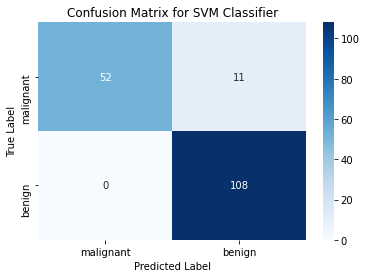

In [26]:
# Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [27]:
# Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVR model
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) of SVR: {mae:.4f}")


Mean Absolute Error (MAE) of SVR: 0.5768


ROC-AUC Score: 0.9922


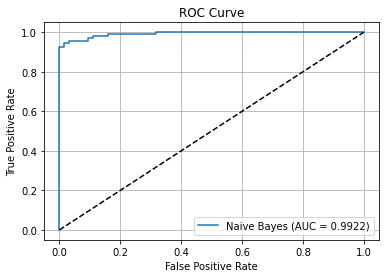

In [28]:
# Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities for positive class
y_proba = nb.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


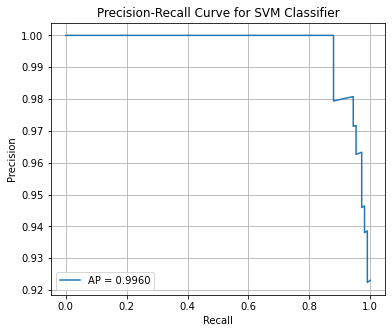

In [29]:
# Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM classifier with probability estimates enabled
svm = SVC(kernel='rbf', gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()


---The_end---